# 03. Pytorch Computer Vision

Reference: https://www.learnpytorch.io/03_pytorch_computer_vision/ 

- [torchvision](https://pytorch.org/vision/stable/index.html) - Contains datasets, model architectures and image transformations often used for computer vision problems.
- [torchvision.datasets](https://pytorch.org/vision/stable/datasets.html) - ger datasets and data loading functions for computer vision
- [torchvision.models](https://pytorch.org/vision/stable/models.html) - contains pretrained models for computer vision
- [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html) - operations to apply on images such as transforms, conversions, etc.
- [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) - Base dataset class for PyTorch
- [torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) - Creates a Python iterable over a dataset

In [1]:
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu117
0.15.2+cu117


In [2]:
# Getting a dataset

train_data = datasets.FashionMNIST(root='data', 
                                train=True, 
                                download=True, 
                                transform=ToTensor(), # convert the image to a PyTorch tensor
                                target_transform=None) # transform the label into a tensor

test_data = datasets.FashionMNIST(root='data',
                                train=False,
                                download=True,
                                transform=ToTensor(),
                                target_transform=None)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# Seet the first training example
image, label = train_data[0]
print(f"Image shape: {image.shape}, Label: {label}")

Image shape: torch.Size([1, 28, 28]), Label: 9


In [5]:
class_names = train_data.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

(-0.5, 27.5, 27.5, -0.5)

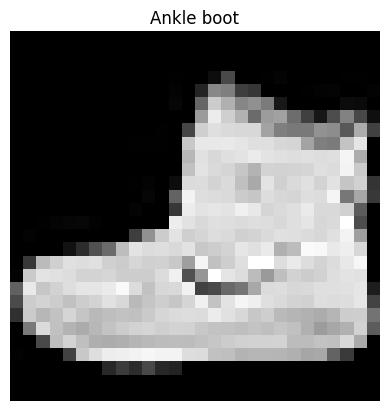

In [7]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"{class_names[label]}")
plt.axis('off')

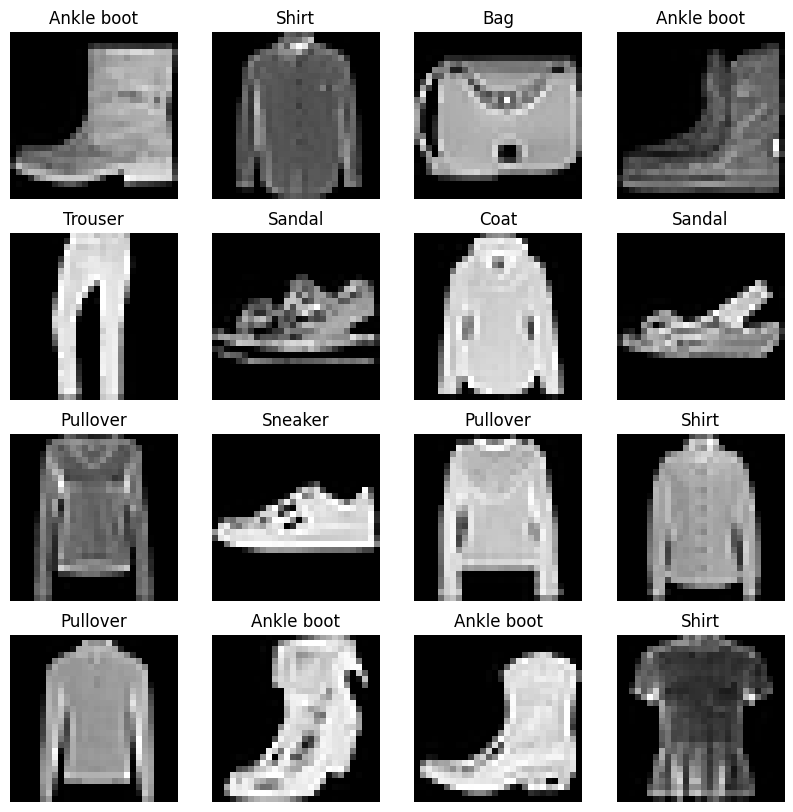

In [8]:
# Visualize random images

torch.manual_seed(42)
fig = plt.figure(figsize=(10, 10))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    sample_idx = torch.randint(0, len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    fig.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])

In [9]:
# Create a dataloader
# DataLoader turns our dataset into a Python iterable

from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False) # generally don't shuffle test data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f523b6ea650>,
 <torch.utils.data.dataloader.DataLoader at 0x7f52415bc5d0>)

In [10]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Len of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE} images")
print(f"Len of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE} images")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f523b6ea650>, <torch.utils.data.dataloader.DataLoader object at 0x7f52415bc5d0>)
Len of train_dataloader: 1875 batches of 32 images
Len of test_dataloader: 313 batches of 32 images


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

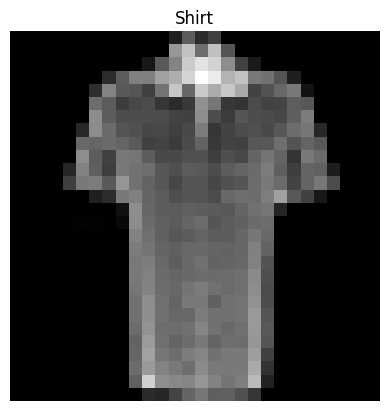

In [12]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=(1,)).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f'{class_names[label]}')
plt.axis('off')

In [13]:
# Start with a baseline model

flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"Print shape before flatten: {x.shape}")
print(f"Print shape after flatten: {output.shape}")

Print shape before flatten: torch.Size([1, 28, 28])
Print shape after flatten: torch.Size([1, 784])


In [14]:
class FashionMNISTV0(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape))

    def forward(self, x):
        return self.layer_stack(x)

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = FashionMNISTV0(input_shape=28*28, hidden_units=128, output_shape=len(class_names)).to(device)
print(model_0)

FashionMNISTV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=128, bias=True)
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [15]:
dummmy_x = torch.rand([1, 1, 28, 28]).to(device)
model_0(dummmy_x), model_0(dummmy_x).shape

(tensor([[-0.2287, -0.3510,  0.1494, -0.1733,  0.2300, -0.0905, -0.0509,  0.0421,
           0.0642,  0.0717]], device='cuda:0', grad_fn=<AddmmBackward0>),
 torch.Size([1, 10]))

In [16]:
# Setup loss, optimizer, and evaluation metric
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.001)

In [17]:
# Create a function to time our experiments
from timeit import default_timer as timer

def print_train_time(start,
                     end,
                     device):
    
    total_time = end - start
    print(f'Training time on {device}: {total_time:.3f} seconds')
    return total_time

In [18]:
start = timer()
# some code...
end = timer()
print_train_time(start, end, device=device)

Training time on cuda: 0.000 seconds


1.9820407032966614e-05

In [19]:
ab = next(iter(train_dataloader))[0]
ab.shape, ab.device

(torch.Size([32, 1, 28, 28]), device(type='cpu'))

In [20]:
# Create a training loop

from tqdm.auto import tqdm

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 5

train_time_start_on = timer()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1} \n----------")
    # Training
    train_loss = 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        # move data to device
        X, y = X.to(device), y.to(device)

        # forward pass
        y_pred = model_0(X)

        # loss calculation (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss

        # zero gradients
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update weights 
        optimizer.step() # NOTE: updating weights for every batch, so model is learning from every batch

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # NOTE: now we are in epoch loop
    # Divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:

            # move data to device
            X_test, y_test = X_test.to(device), y_test.to(device)
            
            test_pred = model_0(X_test)
            
            test_loss += loss_fn(test_pred, y_test)

            # accuracy
            test_acc += accuracy_fn(y_true=y_test, 
                                    y_pred=test_pred.argmax(dim=1)) # argmax to get index of highest value instead of logits
        
        # calculate the test loss average per batch
        test_loss /= len(test_dataloader) # Will get loss epoch-wise

        # calculate the test accuracy average per batch
        test_acc /= len(test_dataloader) # Will get accuracy epoch-wise

    print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test accuracy: {test_acc:.4f}\n")

# calculate training time
train_time_end_on = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on, end=train_time_end_on, device=device)

/home/kpatel2s/miniconda3/envs/pytorch_practice/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 20%|██        | 1/5 [00:04<00:18,  4.50s/it]


Train loss: 1.6921 | Test loss: 1.2696 | Test accuracy: 64.4169

Epoch 2 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 40%|████      | 2/5 [00:08<00:13,  4.49s/it]


Train loss: 1.0790 | Test loss: 0.9662 | Test accuracy: 67.3722

Epoch 3 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 60%|██████    | 3/5 [00:13<00:08,  4.46s/it]


Train loss: 0.8863 | Test loss: 0.8470 | Test accuracy: 69.9081

Epoch 4 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


 80%|████████  | 4/5 [00:18<00:04,  4.52s/it]


Train loss: 0.7954 | Test loss: 0.7801 | Test accuracy: 72.9732

Epoch 5 
----------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples


100%|██████████| 5/5 [00:22<00:00,  4.50s/it]


Train loss: 0.7384 | Test loss: 0.7338 | Test accuracy: 74.4309

Training time on cuda: 22.514 seconds


In [21]:
# Make prediction and visualize the result

torch.manual_seed(42)

def eval_model(model,
               data_loader,
               loss_fn,
               accuracy_fn):
    """
    Evaluate the model on the given data_loader with the given loss function
    """

    loss, acc = 0, 0

    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss.item(),
            "model_acc" : acc}

# Calculate model 0 results on test data
model_0_results = eval_model(model=model_0,
                            data_loader=test_dataloader,
                            loss_fn=loss_fn,
                            accuracy_fn=accuracy_fn)
print(model_0_results)


100%|██████████| 313/313 [00:00<00:00, 573.86it/s]

{'model_name': 'FashionMNISTV0', 'model_loss': 0.7338302731513977, 'model_acc': 74.43091054313099}


# NEXT: 105. Running Experiments on GPU, [Course Link](https://youtu.be/Z_ikDlimN6A?t=59164)